In [ ]:
1.What is Boosting in Machine Learning?

Boosting is an ensemble technique that combines multiple weak learners (usually decision trees) 
sequentially to create a strong model by focusing on misclassified instances.

In [ ]:
2.How does Boosting differ from Bagging?

Boosting builds models sequentially with each model correcting errors of the previous one, whereas Bagging builds
models independently and aggregates their results (e.g., Random Forest).

In [ ]:
3.What is the key idea behind AdaBoost?

AdaBoost assigns weights to training samples and adjusts them based on misclassification, focusing more on difficult examples in subsequent models.

In [ ]:
4.Explain the working of AdaBoost with an example.

AdaBoost initializes equal weights for all training samples, trains a weak learner, updates weights to focus on misclassified samples,
and repeats this process iteratively. Example: A decision tree (stump) is used as a weak learner, and its mistakes guide the next iteration.

In [ ]:
5.What is Gradient Boosting, and how is it different from AdaBoost?

Gradient Boosting minimizes a loss function by training weak learners in a stage-wise manner, optimizing predictions using gradient descent. 
Unlike AdaBoost, it reduces errors by modeling residuals instead of adjusting sample weights.

In [ ]:
6.What is the loss function in Gradient Boosting?

It depends on the problem: Mean Squared Error (MSE) for regression, Log Loss for classification, etc.

In [ ]:
7.How does XGBoost improve over traditional Gradient Boosting?

XGBoost is optimized for speed and performance using parallel computing, regularization (L1 & L2), and handling missing values efficiently.

In [ ]:
8.What is the difference between XGBoost and CatBoost?

XGBoost is optimized for numerical data, while CatBoost is designed for categorical data, handling categorical
variables efficiently using ordered boosting.

In [ ]:
9.What are some real-world applications of Boosting techniques?

Fraud detection, medical diagnosis, customer churn prediction, stock market analysis, and NLP tasks.

In [ ]:
10.How does regularization help in XGBoost?

Regularization (L1 & L2) prevents overfitting by penalizing large weights in trees, ensuring generalization.

In [ ]:
11.What are some hyperparameters to tune in Gradient Boosting models?

Learning rate, number of estimators, max depth, min child weight, subsample, and gamma.

In [ ]:
12.What is the concept of Feature Importance in Boosting?

It measures the impact of each feature on predictions, helping in feature selection and model interpretability.

In [ ]:
13.Why is CatBoost efficient for categorical data?

It uses ordered boosting and efficient encoding techniques like target statistics to handle categorical variables without preprocessing.

In [ ]:
# Practical

In [8]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
python -m pip install --upgrade pip


SyntaxError: invalid syntax (3439513114.py, line 1)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error, f1_score, roc_curve, auc, log_loss, confusion_matrix
from sklearn.datasets import make_classification, make_regression, load_breast_cancer
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor

ModuleNotFoundError: No module named 'catboost'

In [2]:
#14 Train an AdaBoost Classifier on a sample dataset and print model accuracy
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Accuracy: 0.875


In [3]:
#15.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = AdaBoostRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("AdaBoost Regressor MAE:", mean_absolute_error(y_test, y_pred))

AdaBoost Regressor MAE: 78.61805360873889


In [4]:
#16.
# 3. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Feature Importance:", model.feature_importances_)

Feature Importance: [1.29234808e-05 2.78045836e-02 2.01183642e-04 4.25403304e-04
 2.46660446e-03 2.99604699e-03 9.22233287e-04 4.50527588e-01
 5.19940461e-04 1.06691601e-04 6.87020789e-03 3.60401381e-03
 1.15680237e-03 8.41527251e-03 5.56452892e-04 2.51063498e-03
 1.30679228e-02 2.03810848e-03 7.02862580e-04 4.22393330e-03
 7.55888752e-02 3.98864800e-02 5.14082111e-02 3.82446946e-02
 4.81083076e-03 4.50121585e-04 1.87249757e-02 2.40103086e-01
 1.47800843e-03 1.75306929e-04]


In [5]:
#17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Gradient Boosting Regressor R^2 Score:", r2_score(y_test, y_pred))

Gradient Boosting Regressor R^2 Score: 0.9211449721893207


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error, f1_score, roc_curve, auc, log_loss, confusion_matrix
from sklearn.datasets import make_classification, make_regression, load_breast_cancer

try:
    import xgboost as xgb
except ModuleNotFoundError:
    print("XGBoost is not installed. Please install it using 'pip install xgboost'.")
    xgb = None

try:
    from catboost import CatBoostClassifier, CatBoostRegressor
except ModuleNotFoundError:
    print("CatBoost is not installed. Please install it using 'pip install catboost'.")
    CatBoostClassifier = None
    CatBoostRegressor = None

CatBoost is not installed. Please install it using 'pip install catboost'.


In [12]:
# Q18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
if xgb:
    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    print("XGBoost Classifier Accuracy:", accuracy_score(y_test, xgb_pred))

XGBoost Classifier Accuracy: 0.895


C:\Users\Anil Gaikwad\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:39:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [13]:

# Q19. Train a CatBoost Classifier and evaluate using F1-Score
if CatBoostClassifier:
    cat_model = CatBoostClassifier(iterations=100, verbose=0)
    cat_model.fit(X_train, y_train)
    y_pred = cat_model.predict(X_test)
    print("CatBoost Classifier F1 Score:", f1_score(y_test, y_pred))

In [14]:
# Q20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
if xgb:
    X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    xgb_reg = xgb.XGBRegressor(n_estimators=100)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_test)
    print("XGBoost Regressor MSE:", mean_squared_error(y_test, y_pred))

XGBoost Regressor MSE: 5530.474182881578


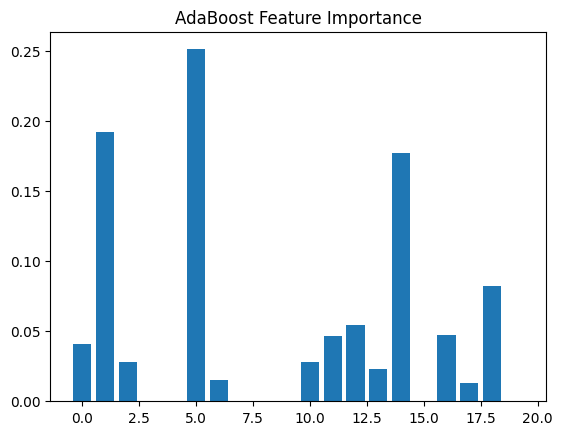

In [16]:
# Q21. Train an AdaBoost Classifier and visualize feature importance
X_class, y_class = make_classification(n_samples=1000, n_features=20, random_state=42)  # Ensure classification dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train_class, y_train_class)

plt.bar(range(X_class.shape[1]), ada_model.feature_importances_)
plt.title("AdaBoost Feature Importance")
plt.show()


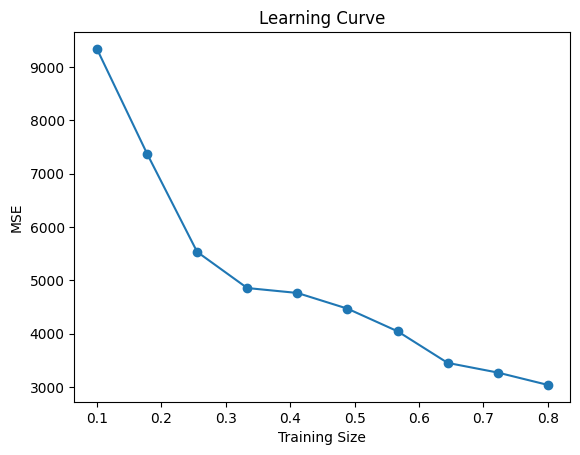

In [19]:

# Q22. Train a Gradient Boosting Regressor and plot learning curves
def plot_learning_curve(model, X, y):
    train_sizes = np.linspace(0.1, 0.8, 10, dtype=float)
    train_scores = []
    for size in train_sizes:
        X_train, _, y_train, _ = train_test_split(X, y, train_size=size, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        train_scores.append(mean_squared_error(y_test, y_pred))
    plt.plot(train_sizes, train_scores, marker='o')
    plt.title("Learning Curve")
    plt.xlabel("Training Size")
    plt.ylabel("MSE")
    plt.show()

plot_learning_curve(GradientBoostingRegressor(n_estimators=100), X, y)

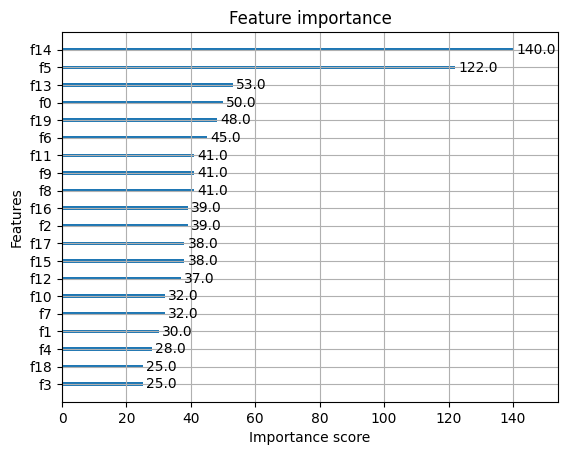

In [20]:
# Q23. Train an XGBoost Classifier and visualize feature importance
if xgb:
    xgb.plot_importance(xgb_model)
    plt.show()

In [39]:

# Q24. Train a CatBoost Classifier and plot the confusion matrix
if CatBoostClassifier:
    X_cat, y_cat = make_classification(n_samples=1000, n_features=20, random_state=42)  # Ensure classification data
    X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

    cat_model = CatBoostClassifier(iterations=100, verbose=0)
    cat_model.fit(X_train_cat, y_train_cat)
    y_pred_cat = cat_model.predict(X_test_cat)

    cm = confusion_matrix(y_test_cat, y_pred_cat)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("CatBoost Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


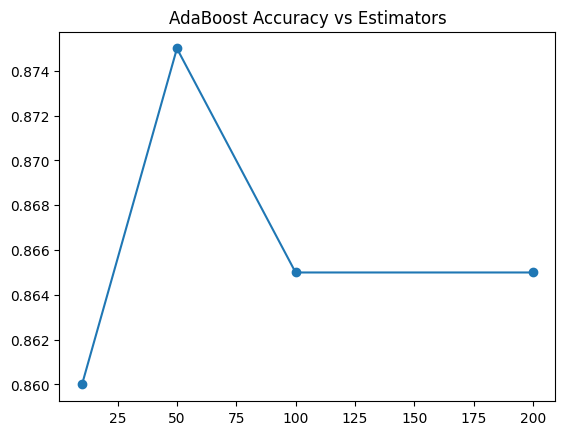

In [23]:
# Q25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
X_class, y_class = make_classification(n_samples=1000, n_features=20, random_state=42)  # Ensure classification dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

estimators = [10, 50, 100, 200]
accuracies = []
for n in estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    accuracies.append(accuracy_score(y_test_class, y_pred))

plt.plot(estimators, accuracies, marker='o')
plt.title("AdaBoost Accuracy vs Estimators")
plt.show()


Error: ROC curve is only applicable for binary classification.


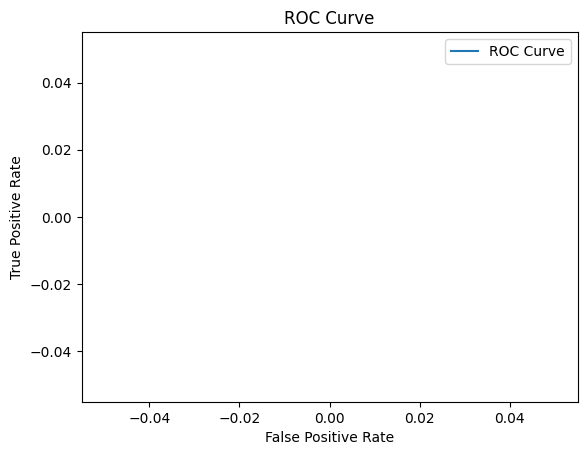

In [28]:

# Q26. Train a Gradient Boosting Classifier and visualize the ROC curve
if hasattr(ada_model, 'predict_proba') and len(np.unique(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, ada_model.predict_proba(X_test)[:, 1])
else:
    print('Error: ROC curve is only applicable for binary classification.')
    fpr, tpr = [], []

plt.plot(fpr, tpr, label='ROC Curve')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [29]:
# Q27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV
if xgb:
    param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}
    grid = GridSearchCV(xgb_reg, param_grid, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    print("Best Learning Rate:", grid.best_params_)

Best Learning Rate: {'learning_rate': 0.1}


In [38]:
# Q28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
if CatBoostClassifier:
    X_imbalance, y_imbalance = make_classification(
        n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42  # Ensure imbalance
    )
    X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imbalance, y_imbalance, test_size=0.2, random_state=42)

    cat_model = CatBoostClassifier(auto_class_weights='Balanced', iterations=100, verbose=0)
    cat_model.fit(X_train_imb, y_train_imb)
    y_pred_imb = cat_model.predict(X_test_imb)

    print("F1 Score with Class Weighting:", f1_score(y_test_imb, y_pred_imb))


In [35]:

# Q29. Train an AdaBoost Classifier and analyze the effect of different learning rates
learning_rates = [0.01, 0.1, 0.5, 1.0]
for lr in learning_rates:
    model = AdaBoostClassifier(learning_rate=lr, n_estimators=50, random_state=42)
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    print(f"AdaBoost Accuracy with learning rate {lr}: {accuracy_score(y_test_class, y_pred)}")

AdaBoost Accuracy with learning rate 0.01: 0.86
AdaBoost Accuracy with learning rate 0.1: 0.86
AdaBoost Accuracy with learning rate 0.5: 0.86
AdaBoost Accuracy with learning rate 1.0: 0.875


In [36]:
# Q30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
if xgb:
    X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, random_state=42)
    xgb_model = xgb.XGBClassifier(n_estimators=100)
    xgb_model.fit(X, y)
    y_pred_proba = xgb_model.predict_proba(X)
    print("Multi-Class Log Loss:", log_loss(y, y_pred_proba))

Multi-Class Log Loss: 0.006740955210012613
